# Dopasowanie wzorca do tekstu

Zaimplementuj w Pythonie algorytmy wyszukiwania wzorców:
- naiwny
- automat skończony
- algorytm KMP

In [1]:
def naive_matching(pattern, text, _=[]) -> list[int]:
    result = []
    for s in range(len(text) - len(pattern) + 1):
        if pattern == text[s:s+len(pattern)]:
            result.append(s)
    return result

# get_slice długości k - O(k) -> https://wiki.python.org/moin/TimeComplexity#list
# bardziej wydajne niz porównywanie w pętli 
# złożoność O((n-m)*m)/O(nm)

In [2]:
def finit_state_matching(pattern, text, pre=[]) -> list[int]:
    if len(pre) == 0:
        alphabet = {l for l in text + pattern}
        delta = build_delta(pattern, alphabet)
    else:
        delta = pre
        
    result = []
    m = len(pattern)
    q = 0
    for i in range(len(text)):
        q = delta[q][text[i]]
        if q == m:
            result.append(i - q + 1)
    return result

def build_delta(pattern, alphabet):
    delta = []
    for q in range(len(pattern) + 1):
        delta.append({})
        for letter in alphabet:
            k = q + 1
            while k > 0 and pattern[:k] != (pattern[:q] + letter)[-k:]:
                k = k - 1
            delta[q][letter] = k
    return delta

# złożoność finit_state_matching O(n) + tworzenie macierzy przejścia
# moim zdaniem duża złożoność budowania macierzy przejścia - O(m^3*len(alfabet))
# ale jeśli alfabet i wzorzec są krótkie, to mamy złożoność całości praktycznie liniową

In [3]:
def kmp_matching(pattern, text, pre=[]) -> list[int]:
    if len(pre) == 0:
        prefixes = build_prefixes(pattern)
    else:
        prefixes = pre
        
    result = []
    q = 0
    for i in range(len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = prefixes[q-1]
        if pattern[q] == text[i]:
            q += 1
        if q == len(pattern):
            result.append(i - q + 1)
            q = prefixes[q-1]
    return result

def build_prefixes(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k-1]
        if pattern[k]  == pattern[q]:
            k += 1
        pi.append(k)
    return pi

# złożoność build_prefixes - O(m) bo ta pętla while jest ograniczona podobno :o
# w sumie fajny ten algorytm
# złożoność kmp - O(m) na tej samej zasadzie

Zaimplementuj testy porównujące szybkość działania wyżej wymienionych algorytmów, z rozbiciem na czasu pre-processingu oraz czas wyszukiwania wzorca w tekście (1p).

In [4]:
import time

def pattern_matching_test(func, pattern, text, preprocessing=True, print_res=True):
    if print_res:
        print(f'Testing: {func.__name__}...')
    pre_data = []
    pre_time = None
    if preprocessing:
        if func.__name__ == "naive_matching":
            start = time.time()
            end = time.time()
        elif func.__name__ == "finit_state_matching":
            start = time.time()
            alphabet = {l for l in text + pattern}
            pre_data = build_delta(pattern, alphabet)
            end = time.time()
        elif func.__name__ == "kmp_matching":
            start = time.time()
            pre_data = build_prefixes(pattern)
            end = time.time()
        else:
            raise("Unknown function!")

        pre_time = end - start
        if print_res: 
            print("   PREPROCESSING:", pre_time)

    start = time.time()
    func(pattern, text, pre_data)
    end = time.time()
    if print_res:
        print("   OPERATION TIME:", end - start)
        print("   FUNCTION OUTPUT:", func(pattern, text, pre_data))
    return (pre_time, end - start) # (preprocessing_time, matching_time)

In [5]:
p = "bgjfjdkhgkjfdhasdljkfhabahjkfd"
t = "ababadfabgjfjdkhgkjfdhasdljkfhabahjkfdsjlkjh"

pattern_matching_test(naive_matching, p, t)
pattern_matching_test(finit_state_matching, p, t)
pattern_matching_test(kmp_matching, p, t)
print("end")

Testing: naive_matching...
   PREPROCESSING: 0.0
   OPERATION TIME: 0.0
   FUNCTION OUTPUT: [8]
Testing: finit_state_matching...
   PREPROCESSING: 0.0010085105895996094
   OPERATION TIME: 0.0
   FUNCTION OUTPUT: [8]
Testing: kmp_matching...
   PREPROCESSING: 0.0
   OPERATION TIME: 0.0
   FUNCTION OUTPUT: [8]
end


Znajdź wszystkie wystąpienia wzorców "pan" oraz "pani" w załączonym pliku, za pomocą każdego algorytmu. 

W raporcie zamieść liczbę dopasowań każdego ze wzorców osobno dla każdego algorytmu. Upewnij się, że każdy algorytm zwraca taką samą liczbę dopasowań (1p).

In [6]:
def process_file(file, func):
    file = open(file, 'r', encoding='utf-8')
    text = file.read()
    result = func(pattern1, text) + func(pattern2, text)
    return set(result)

pattern1 = "pan"
pattern2 = "pani"

funcs = [naive_matching, finit_state_matching, kmp_matching]
result = {}
for func in funcs:
    result[func.__name__] = process_file("pan-tadeusz.txt", func)
    print(f"{func.__name__.upper()}:")
    print(result[func.__name__])
    print("Sum:", len(result[func.__name__]), "\n")

print("CONSISTENT VALUES?:", result["naive_matching"] == result["finit_state_matching"] == result["kmp_matching"])

NAIVE_MATCHING:
{350232, 49183, 428069, 192552, 288811, 98356, 49217, 249921, 102472, 151625, 288844, 22610, 348242, 411742, 385137, 59506, 106615, 424056, 338047, 129, 276629, 182422, 53408, 411810, 161955, 354470, 407724, 192687, 2227, 362685, 192702, 301253, 39114, 389331, 413911, 274652, 422112, 65761, 104676, 424165, 16616, 188648, 389360, 342257, 8189, 323827, 289018, 94460, 254205, 53503, 243967, 246016, 397567, 153859, 53510, 268552, 37133, 356622, 254224, 305424, 203027, 170262, 268570, 57629, 200989, 252190, 411935, 35105, 397611, 426287, 14647, 47418, 102730, 201035, 346445, 270672, 293202, 80212, 389462, 82265, 53596, 49509, 18797, 389485, 115063, 59769, 10618, 16774, 201096, 407945, 137616, 53654, 55739, 205250, 53702, 192978, 307666, 53728, 55784, 20973, 57838, 57846, 88567, 143862, 309759, 217600, 201225, 57867, 203278, 381464, 33305, 234010, 145947, 88612, 244260, 338477, 391729, 250434, 186960, 53843, 100950, 307801, 51808, 152160, 98915, 39525, 33394, 219762, 199289, 

Porównaj szybkość działania algorytmów dla problemu z p. 3, z uwzględnieniem czasu pre-processingu oraz czasu dopasowania. 

Pomiar czasu powinien być przeprowadzony co najmniej 5-krotnie i przedstawione w formie tabeli oraz wykresu, uwzględniającego czas minimalny, maksymalny oraz średni czas (1p).

In [7]:
funcs = [naive_matching, finit_state_matching, kmp_matching]
result = {
    "naive_matching" : [],
    "finit_state_matching" : [],
    "kmp_matching" : []
}

pattern1 = "pan"
pattern2 = "pani"

file = open("pan-tadeusz.txt", 'r', encoding='utf-8')
text = file.read()

for func in funcs:
    for _ in range(5):
        time1 = pattern_matching_test(func, pattern1, text, print_res=False)
        time2 = pattern_matching_test(func, pattern2, text, print_res=False)

        result[func.__name__].append((time1[0] + time2[0], time1[1] + time2[1]))

In [8]:
# tabela

data = []
for key in result.keys():
    for record in result[key]:
        data.append([key, record[0], record[1], record[0] + record[1]])
        
col_lengths = [max(len(str(x)) for x in col) for col in zip(*data)]

headers = ["Function", "Preprocessing time", "Matching time", "Real time"]
header_row = " | ".join('{:<{}}'.format(h, col_lengths[i]) for i, h in enumerate(headers))

separator = '-' * len(header_row)

data_rows = []
for row in data:
    data_rows.append(' | '.join('{:<{}}'.format(str(r), col_lengths[i]) for i, r in enumerate(row)))

table = "\n".join([header_row, separator] + data_rows)
print(table)

Function             | Preprocessing time   | Matching time       | Real time          
---------------------------------------------------------------------------------------
naive_matching       | 0.0                  | 0.15935111045837402 | 0.15935111045837402
naive_matching       | 0.0                  | 0.14942097663879395 | 0.14942097663879395
naive_matching       | 0.0                  | 0.15161442756652832 | 0.15161442756652832
naive_matching       | 0.0                  | 0.16672587394714355 | 0.16672587394714355
naive_matching       | 0.0                  | 0.17978382110595703 | 0.17978382110595703
finit_state_matching | 0.02394580841064453  | 0.07762694358825684 | 0.10157275199890137
finit_state_matching | 0.018465518951416016 | 0.07454800605773926 | 0.09301352500915527
finit_state_matching | 0.022137165069580078 | 0.0749058723449707  | 0.09704303741455078
finit_state_matching | 0.019496917724609375 | 0.08264470100402832 | 0.1021416187286377 
finit_state_matching | 0.0195095

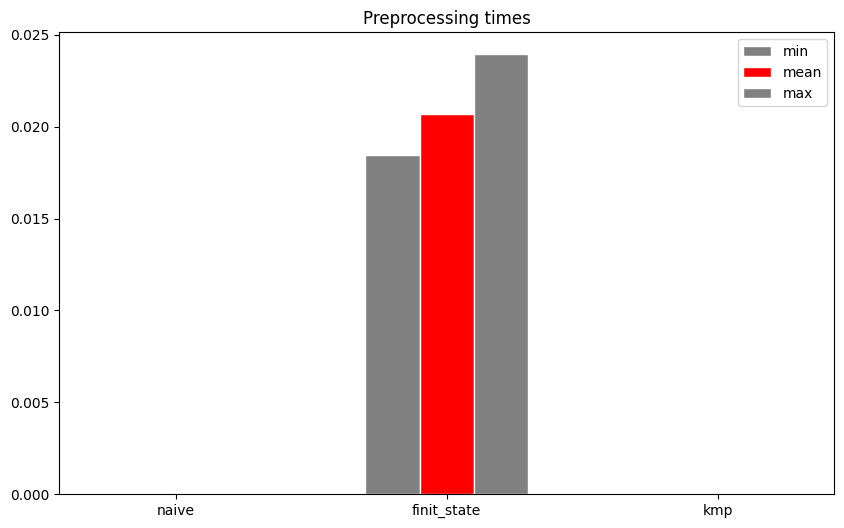

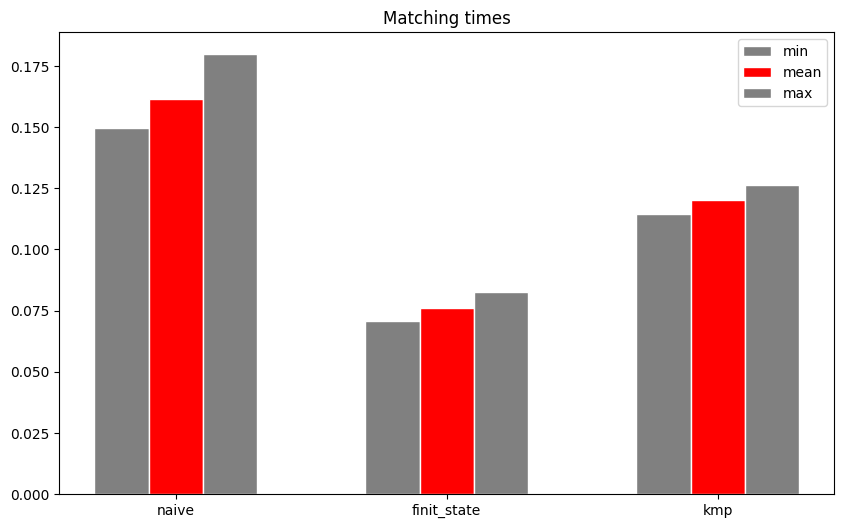

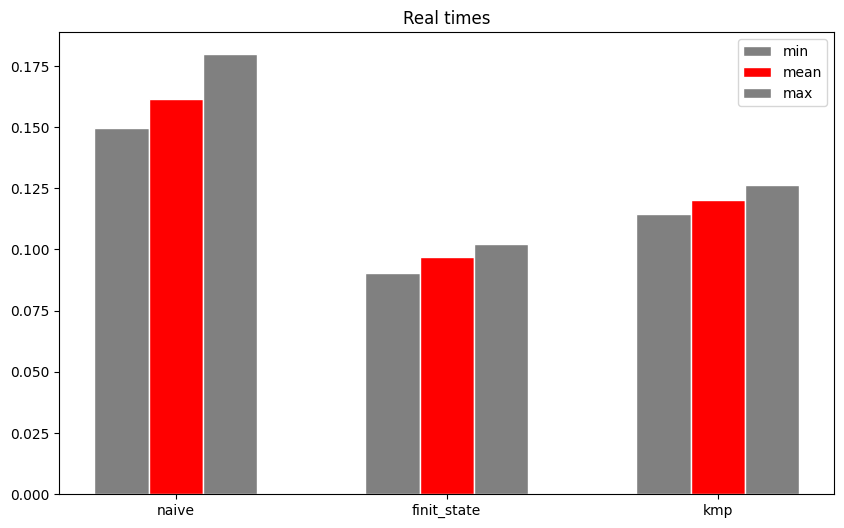

In [9]:
# wykres

import matplotlib.pyplot as plt
import numpy as np

names = ["naive", "finit_state", "kmp"]

funcs = [naive_matching, finit_state_matching, kmp_matching]
pre_times = {}
match_times = {}
real_times = {}

for func in funcs:
    times = [x[0] for x in result[func.__name__]]
    pre_times[func.__name__] = (sum(times)/len(times), min(times), max(times))
    times = [x[1] for x in result[func.__name__]]
    match_times[func.__name__] = (sum(times)/len(times), min(times), max(times))
    times = [x[0] + x[1] for x in result[func.__name__]]
    real_times[func.__name__] = (sum(times)/len(times), min(times), max(times))

for name, data in {"Preprocessing times" : pre_times, "Matching times" : match_times, "Real times" : real_times}.items():
    fig = plt.figure(figsize=(10, 6))
    MIN = []
    MAX = []
    MEAN = []
    for func in funcs:
        MIN.append(data[func.__name__][1])
        MAX.append(data[func.__name__][2])
        MEAN.append(data[func.__name__][0])

    bar_width = 0.20
    ind = np.arange(len(MIN))

    br1 = np.arange(len(MIN))
    br2 = [x + bar_width for x in br1]
    br3 = [x + bar_width for x in br2]

    plt.bar(br1, MIN, color ='grey', width = bar_width,
        edgecolor ='white', label ='min')
    plt.bar(br2, MEAN, color ='red', width = bar_width,
            edgecolor ='white', label ='mean')
    plt.bar(br3, MAX, color ='grey', width = bar_width,
            edgecolor ='white', label ='max')
    
    plt.title(name)
    plt.xticks([r + bar_width for r in range(len(MIN))], names)
    plt.legend()
    plt.show()


Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. 

Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy (1p).

In [17]:
text = "aaaa" * 1000000
pattern = "a" * 100000

naive = pattern_matching_test(naive_matching, pattern, text, print_res=False)
finit_state = pattern_matching_test(finit_state_matching, pattern, text, print_res=False)
kmp = pattern_matching_test(kmp_matching, pattern, text, print_res=False)

print("NAIVE:", naive[1])
print("FINIT_STATE:",finit_state[0], finit_state[1])
print("KMP:",kmp[0], kmp[1])

print("5 times shorter?:", naive[1] / finit_state[1] >= 5 and naive[1] / kmp[1] >= 5)

NAIVE: 22.2615647315979
FINIT_STATE: 0.5462710857391357 0.6782498359680176
KMP: 0.014113903045654297 1.3242805004119873
5 times shorter?: True


Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami (1p).

# Wnioski:
- W ramach testów przeprowadzonych podczas zadania, wszystkie algorytmy zwróciły takie same wyniki. Pozwala nam to przypuszczać, że zostały poprawnie zaimplementowane.
- Najwolniejszy okazał się algorytm naiwny. Nie wymagał preprocessingu, ale czas działania rósł wprostproporcjonalnie do tekstu (n). Dla dłużych tekstów szybkość działania tego algorytmu może okazać się nieakceptowalna.
- Algorytm automatu skończonego okazałsię znacznie szybszy niż algorytm naiwny, ale wymagał czasochłonnego preprocessingu. Czas preprocessingu rośnie proporcjonalny do długości wzorca (m^3*len(alph)).
W przypadku długich wzorcó może to stanowić poważny problem :c.
- Algorytm KMP okazał się najszybszym spośród testowanej trójki. Podobnie jak algorytm automatu skończonego wymagał preprocessingu, ale czas złożoność budowania danych pomocniczych była zdecydowanie lepsza (m). Samo dopasowanie było jednak wolniejsze niż w algorytmie automatów skończonych.
- Z przeprowadzonych eksperymentów wynika, że algorytmy automatu skończonego i KMP są zdecydowanie lepszą opcją niż stosowanie algorytmu naiwnego. Wybór algorytmu będzie zależał od konkretnych wymagań i wielkości danych wejściowych.